In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1:  Define TSP problem
# In the TSP problem, we have a set of cities with distances between them. The goal is
# to find the shortest possible path that visits each city exactly once and returns to the starting
# city.

In [3]:
def create_distance_matrix(num_cities, seed = 42):
    np.random.seed(seed)
    coordinates = np.random.rand(num_cities, 2) * 100
    
    distance_matrix = np.sqrt(((coordinates[:, np.newaxis]  - coordinates[np.newaxis,:]) ** 2).sum(axis =2))
    
    return coordinates, distance_matrix

In [4]:
# Step 2: Initialize Parameters

In [5]:
num_cities = 10
alpha = 1.0
beta = 5.0
num_ants = 30
evaporation_rate =0.5
pheromone_deposite =  100
pheromone_init=1.0
max_iter = 50

In [6]:
coordinates, distance_matrix = create_distance_matrix(num_cities)
pheromone_matrix = np.ones((num_cities, num_cities) ) * pheromone_init

In [7]:
# Helper: Choose the next city

In [8]:
def choose_next_city(current_city, unvisited_city, pheromone_matrix, distance_matrix, alpha, beta):
    
    pheromone = pheromone_matrix[current_city, unvisited_city] ** alpha
    visibility = (1/ distance_matrix[current_city, unvisited_city]) ** beta 
    probabilities = pheromone * visibility
    probabilities /= probabilities.sum()
    
    return np.random.choice(unvisited_city, p = probabilities)

In [9]:
# Step 3: Build solutions

In [10]:
def build_solution(pheromone_matrix, distance_matrix, alpha, beta, num_ants):
    
    all_routes =[]
    all_distances=[]

    for _ in range(num_ants):
        route =[]
        unvisited = list(range(num_cities))
        current_city = np.random.choice(unvisited)
        route.append(current_city)
        unvisited.remove(current_city)
        
        while unvisited:
            next_city = choose_next_city(current_city,unvisited,pheromone_matrix,distance_matrix, alpha, beta)
            route.append(next_city)
            unvisited.remove(next_city)
            current_city = next_city
            
        route.append(route[0])
        distance = sum(distance_matrix[route[i], route[i+1]] for i in range(num_cities))
        
        
        all_routes.append(route)
        all_distances.append(distance)
    return all_routes, all_distances

In [11]:
# Step 4,5,6: Update Pheromones

In [12]:
def update_pheromones(pheromone_matrix, all_routes, all_distance, evaporation_rate, pheromone_deposite):
    pheromone_matrix *= (1- evaporation_rate)
    
    for route, distance in zip(all_routes, all_distances):
        pheromone = pheromone_deposite / distance
        
        for i in range(num_cities):
            pheromone_matrix[route[i], route[i+1]] += pheromone
            pheromone_matrix[route[i+1], route[i]] += pheromone 

In [13]:
# Step 7: Main ACO loop

In [14]:
best_route = None
best_distance = float('inf')

for iteration in range(max_iter):
   
    all_routes, all_distances = build_solution(pheromone_matrix, distance_matrix, alpha, beta, num_ants)
    update_pheromones(pheromone_matrix, all_routes, all_distances, evaporation_rate, pheromone_deposite)
    
    min_distance_idx = np.argmin(all_distances)
    
    if(all_distances[min_distance_idx] < best_distance):
        best_distance =all_distances[min_distance_idx]
        best_route = all_routes[min_distance_idx]
        
    print(f"Iteration {iteration+1}: Best Distance = {best_distance:.2f}")

Iteration 1: Best Distance = 304.24
Iteration 2: Best Distance = 290.31
Iteration 3: Best Distance = 290.31
Iteration 4: Best Distance = 290.31
Iteration 5: Best Distance = 290.31
Iteration 6: Best Distance = 290.31
Iteration 7: Best Distance = 290.31
Iteration 8: Best Distance = 290.31
Iteration 9: Best Distance = 290.31
Iteration 10: Best Distance = 290.31
Iteration 11: Best Distance = 290.31
Iteration 12: Best Distance = 290.31
Iteration 13: Best Distance = 290.31
Iteration 14: Best Distance = 290.31
Iteration 15: Best Distance = 290.31
Iteration 16: Best Distance = 290.31
Iteration 17: Best Distance = 290.31
Iteration 18: Best Distance = 290.31
Iteration 19: Best Distance = 290.31
Iteration 20: Best Distance = 290.31
Iteration 21: Best Distance = 290.31
Iteration 22: Best Distance = 290.31
Iteration 23: Best Distance = 290.31
Iteration 24: Best Distance = 290.31
Iteration 25: Best Distance = 290.31
Iteration 26: Best Distance = 290.31
Iteration 27: Best Distance = 290.31
Iteration 

In [15]:
# Step 8: Results
print("\nFinal Best Distance:", best_distance)
print("Best Route:", best_route)


Final Best Distance: 290.3067737777875
Best Route: [4, 1, 6, 9, 7, 2, 8, 3, 5, 0, 4]


In [16]:
# Plotting the best path

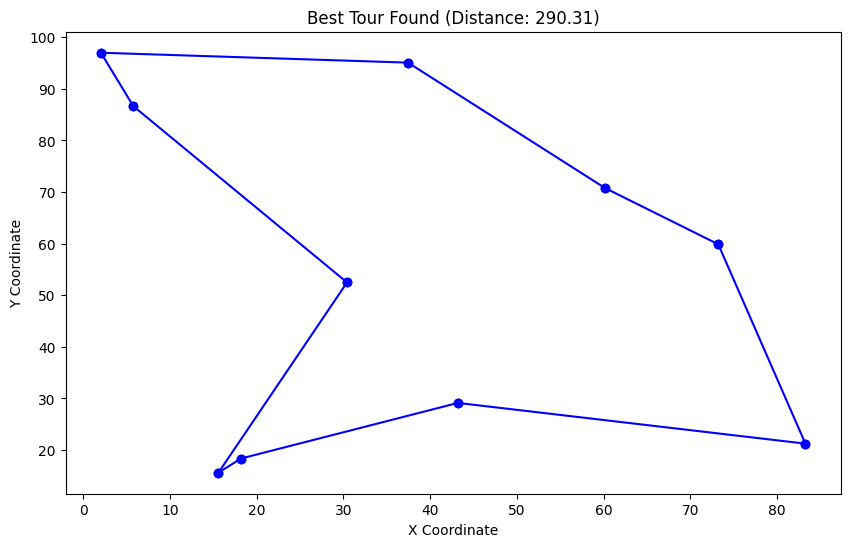

In [17]:
plt.figure(figsize = (10,6))

for i in range(num_cities):
    city1 = coordinates[best_route[i]]
    city2 = coordinates[best_route[i+1]]
    
    plt.plot([city1[0], city2[0]], [city1[1], city2[1]], 'bo-')
    
plt.title(f"Best Tour Found (Distance: {best_distance:.2f})")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

Basic parameters:

Number of cities and ants.

alpha controls how much ants prefer pheromone trails.

beta controls how much ants prefer shorter distances.

evaporation_rate models pheromone decay.

pheromone_deposit controls how much pheromone ants deposit.

pheromone_init initializes the pheromone matrix.
max_iter is the number of iterations (generations) ants will search.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the TSP Problem
def create_distance_matrix(num_cities, seed=42):  #random set of cities and calculate the distance between each pair.
    np.random.seed(seed)  #Sets the seed to make the random values reproducible.
    
    #Randomly generate (x, y) coordinates for each city, scaled between 0 and 100.
    coordinates = np.random.rand(num_cities, 2) * 100  # Random city coordinates
    
    #Calculates Euclidean distances between every pair of cities and stores them in a matrix.
    distance_matrix = np.sqrt(((coordinates[:, np.newaxis] - coordinates[np.newaxis, :]) ** 2).sum(axis=2))
    return coordinates, distance_matrix

# Step 2: Initialize Parameters
num_cities = 10
num_ants = 30
alpha = 1         # Influence of pheromone
beta = 5          # Influence of distance
evaporation_rate = 0.5
pheromone_deposit = 100
pheromone_init = 1.0
max_iter = 50

#Create city coordinates and distance matrix.Initialize pheromone matrix with all values as 1.0.
coordinates, distance_matrix = create_distance_matrix(num_cities) 
pheromone_matrix = np.ones((num_cities, num_cities)) * pheromone_init

# Helper: Choose the next city
#Function to choose the next city based on pheromone strength and distance.
def choose_next_city(current_city, unvisited_cities, pheromone_matrix, distance_matrix, alpha, beta):
    
    #pheromone: How strong the trail is.visibility: How attractive short distances are.
    pheromone = pheromone_matrix[current_city, unvisited_cities] ** alpha
    visibility = (1 / distance_matrix[current_city, unvisited_cities]) ** beta
    
    #Calculate probabilities for choosing each unvisited city.Normalize to sum to 1.
    probabilities = pheromone * visibility
    probabilities /= probabilities.sum()
    
    return np.random.choice(unvisited_cities, p=probabilities)  #Randomly pick next city based on the computed probabilities

# Step 3: Build solutions
#Function to simulate ants building complete routes.
def build_solution(pheromone_matrix, distance_matrix, alpha, beta, num_ants):
    
    all_routes = []   #Initialize storage for all routes and their distances.
    all_distances = []
    
    for _ in range(num_ants):  #For each ant:
        route = []
        unvisited = list(range(num_cities))
        current_city = np.random.choice(unvisited)  #Randomly pick a start city.
        
        #Add the starting city to the route and remove it from unvisited.
        route.append(current_city)
        unvisited.remove(current_city)
        
        #Keep selecting the next city until all cities are visited.
        while unvisited:
            next_city = choose_next_city(current_city, unvisited, pheromone_matrix, distance_matrix, alpha, beta)
            route.append(next_city)
            unvisited.remove(next_city)
            current_city = next_city
        
        route.append(route[0])  # Return to start Return to the start to complete the tour (round trip).
        distance = sum(distance_matrix[route[i], route[i+1]] for i in range(num_cities)) #Calculate total tour distance.
        
        all_routes.append(route)  #Store the route and its distance.
        all_distances.append(distance)
        
    return all_routes, all_distances 



# Step 4,5,6: Update Pheromones
#Function to update pheromone trails after all ants have completed tours.

def update_pheromones(pheromone_matrix, all_routes, all_distances, evaporation_rate, pheromone_deposit):
    
    #Evaporation step: Reduces all pheromones a bit.
    pheromone_matrix *= (1 - evaporation_rate)  # Evaporation

    for route, distance in zip(all_routes, all_distances):
        pheromone = pheromone_deposit / distance  #Stronger pheromone deposited for shorter routes.
        
        #Update pheromone levels on each edge in the route (symmetric TSP).
        for i in range(num_cities):
            pheromone_matrix[route[i], route[i+1]] += pheromone
            pheromone_matrix[route[i+1], route[i]] += pheromone  # Symmetric TSP
            
            
            

# Step 7: Main ACO loop
best_route = None    #Initialize best route and best distance.
best_distance = float('inf')

for iteration in range(max_iter):  #For each iteration:
    
    #Build solutions and update pheromones.
    all_routes, all_distances = build_solution(pheromone_matrix, distance_matrix, alpha, beta, num_ants)
    update_pheromones(pheromone_matrix, all_routes, all_distances, evaporation_rate, pheromone_deposit)
    
    #Find the index of the best (shortest) route.
    min_distance_idx = np.argmin(all_distances)
    
    #Update if a better route is found.
    if all_distances[min_distance_idx] < best_distance:
        best_distance = all_distances[min_distance_idx]
        best_route = all_routes[min_distance_idx]
    
    print(f"Iteration {iteration+1}: Best Distance = {best_distance:.2f}")

# Step 8: Results
print("\nFinal Best Distance:", best_distance)
print("Best Route:", best_route)

# Plotting the best path
plt.figure(figsize=(10, 6))
for i in range(num_cities):
    city1 = coordinates[best_route[i]]
    city2 = coordinates[best_route[i+1]]
    plt.plot([city1[0], city2[0]], [city1[1], city2[1]], 'bo-')

plt.title(f"Best Tour Found (Distance: {best_distance:.2f})")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()
